In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,LSTM,Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/ml/NSE-TATAGLOBAL.csv"
df = pd.read_csv(path)

In [ ]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [ ]:
df.shape

(2035, 8)

In [ ]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [ ]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')


In [ ]:
for Date in df:
    print(df[Date].unique())

['2018-09-28' '2018-09-27' '2018-09-26' ... '2010-07-23' '2010-07-22'
 '2010-07-21']
[234.05 234.55 240.   ... 118.3  117.3  120.3 ]
[235.95 236.8  240.   ... 121.7  121.95 123.  ]
[230.2  231.1  232.5  ... 111.55 113.8  117.2 ]
[233.5  233.8  235.   ... 112.05 113.2  121.1 ]
[233.75 233.25 234.25 ... 116.5  118.3  116.6 ]
[3069914 5082859 2240909 ...  281312  293312  658666]
[ 7162.35 11859.95  5248.6  ...   340.31   355.17   803.56]


In [ ]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


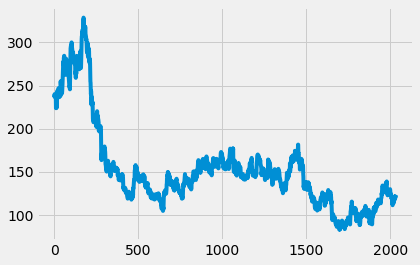

In [ ]:
df_high=df.reset_index()['High']
plt.plot(df_high)

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
df_new = scaler.fit_transform(np.array(df_high).reshape(-1,1))

In [ ]:
df.date=pd.to_datetime(df.Date)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date']

0      2018-09-28
1      2018-09-27
2      2018-09-26
3      2018-09-25
4      2018-09-24
          ...    
2030   2010-07-27
2031   2010-07-26
2032   2010-07-23
2033   2010-07-22
2034   2010-07-21
Name: Date, Length: 2035, dtype: datetime64[ns]

In [ ]:
Date_year=df['Date'].dt.year
print(Date_year)

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
2030    2010
2031    2010
2032    2010
2033    2010
2034    2010
Name: Date, Length: 2035, dtype: int64


In [ ]:
Date_year.unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010])

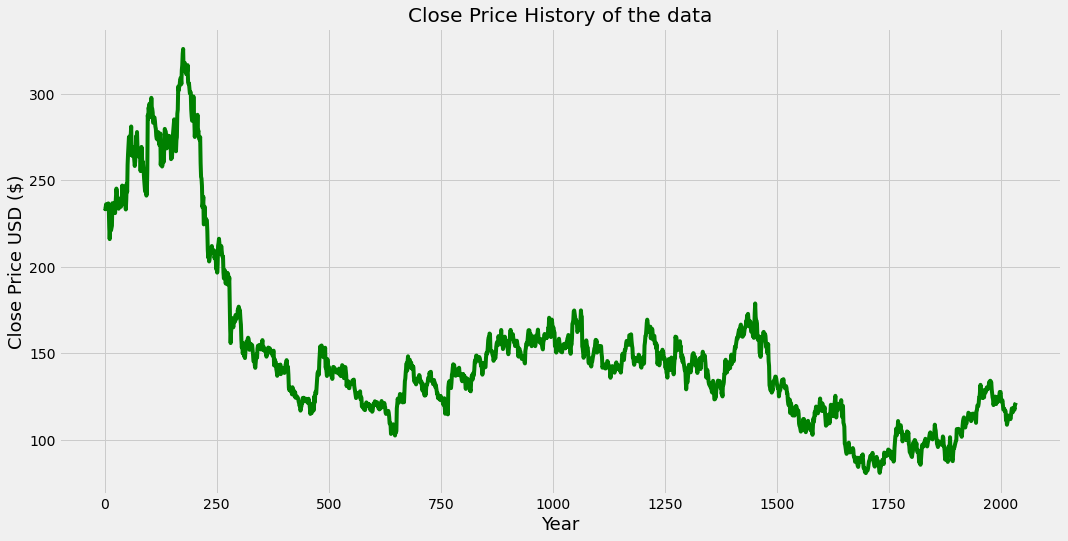

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History of the data',fontsize=20)
plt.plot(df['Close'],color='green')
plt.xlabel('Year',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

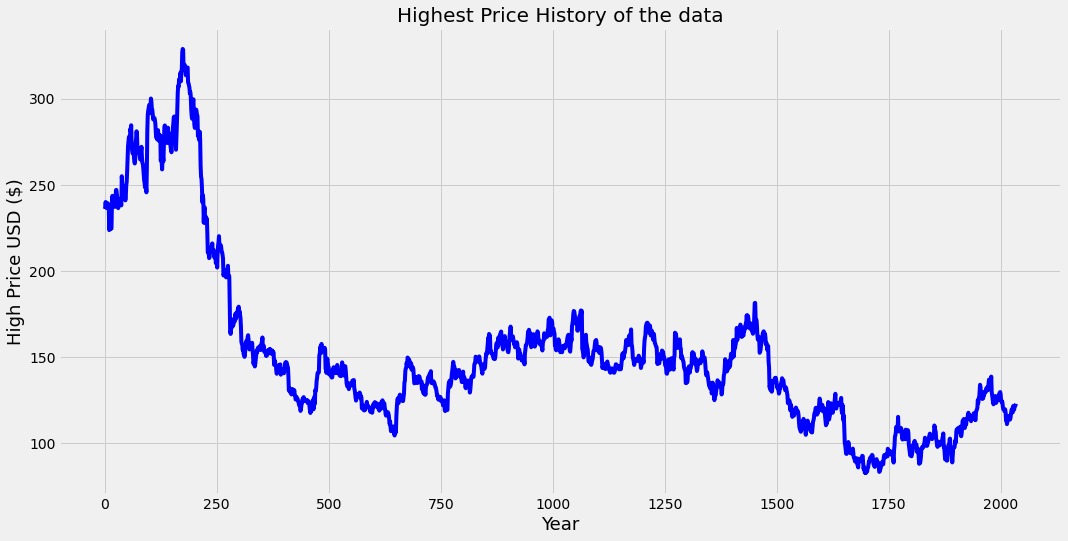

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Highest Price History of the data',fontsize=20)
plt.plot(df['High'],color='blue')
plt.xlabel('Year',fontsize=18)
plt.ylabel('High Price USD ($)',fontsize=18)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


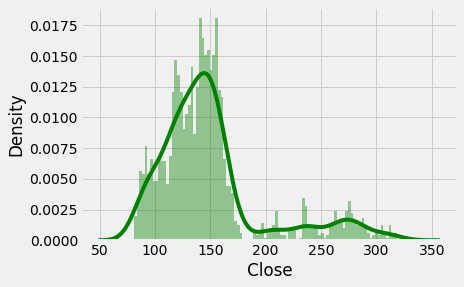

In [ ]:
sns.distplot(df['Close'].dropna(),bins=100,color='green')

In [ ]:
data=df.filter(['Close'])

In [ ]:
dataset=data.values

In [ ]:
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

1628

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scale_data=scaler.fit_transform(dataset)

scale_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [ ]:
#creating the training dataset and scaled training dataset
train_data=scale_data[0:training_data_len,:]

#split the data into x_train and y_train datasets
x_train=[]
y_train=[]

for i in range (80,len(train_data)):
  x_train.append(train_data[i-80:i,0])
  y_train.append(train_data[i,0])
  if i<=81:
    print(x_train)
    print(y_train)
    print()

[array([0.62418301, 0.62214052, 0.62622549, 0.63378268, 0.62234477,
       0.62765523, 0.62888072, 0.62949346, 0.63582516, 0.625     ,
       0.57883987, 0.55167484, 0.57618464, 0.58006536, 0.57230392,
       0.57781863, 0.58312908, 0.63623366, 0.62642974, 0.63337418,
       0.62745098, 0.62254902, 0.6376634 , 0.61294935, 0.63112745,
       0.65196078, 0.67075163, 0.66196895, 0.64705882, 0.63970588,
       0.62745098, 0.62336601, 0.63868464, 0.63480392, 0.63991013,
       0.64767157, 0.62785948, 0.63112745, 0.63194444, 0.67790033,
       0.65870098, 0.65890523, 0.64603758, 0.63705065, 0.67544935,
       0.66319444, 0.6439951 , 0.62152778, 0.64419935, 0.68198529,
       0.6629902 , 0.72691993, 0.75265523, 0.77144608, 0.79166667,
       0.79370915, 0.75714869, 0.77736928, 0.80208333, 0.81719771,
       0.7495915 , 0.76960784, 0.74754902, 0.75428922, 0.76143791,
       0.74979575, 0.73999183, 0.72406046, 0.73488562, 0.76021242,
       0.79411765, 0.78104575, 0.80412582, 0.77062908, 0.7624

In [ ]:
#convert the x_train and y_train to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
#reshaping the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1548, 80, 1)

In [ ]:
y_train

array([0.7120098 , 0.74468954, 0.7689951 , ..., 0.1435866 , 0.13419118,
       0.1431781 ])

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 80, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 80, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
#train the model
model.fit(x_train,y_train,batch_size=64,epochs=100)

Epoch 1/100
25/25 [==============================] - 7s 96ms/step - loss: 0.0071 - accuracy: 6.4599e-04
Epoch 2/100
25/25 [==============================] - 2s 96ms/step - loss: 0.0015 - accuracy: 6.4599e-04
Epoch 3/100
25/25 [==============================] - 2s 86ms/step - loss: 0.0012 - accuracy: 6.4599e-04
Epoch 4/100
25/25 [==============================] - 2s 91ms/step - loss: 0.0011 - accuracy: 6.4599e-04
Epoch 5/100
25/25 [==============================] - 2s 90ms/step - loss: 0.0011 - accuracy: 6.4599e-04
Epoch 6/100
25/25 [==============================] - 2s 90ms/step - loss: 0.0011 - accuracy: 6.4599e-04
Epoch 7/100
25/25 [==============================] - 2s 86ms/step - loss: 0.0010 - accuracy: 6.4599e-04
Epoch 8/100
25/25 [==============================] - 2s 85ms/step - loss: 0.0012 - accuracy: 6.4599e-04
Epoch 9/100
25/25 [==============================] - 2s 92ms/step - loss: 9.9018e-04 - accuracy: 6.4599e-04
Epoch 10/100
25/25 [==============================] - 2s 86m

In [ ]:
#create the testing dataset 
test_data=scale_data[training_data_len -80:,:]

#create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(80,len(test_data)):
  x_test.append(test_data[i-80:i,0])


In [ ]:
#convert the data to a numpy array
x_test=np.array(x_test)

In [ ]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
#get the  models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(predictions,y_test))

3.9682781754787353

In [ ]:
#evaluate the model by RMSE
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse


2.8168505956851293

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


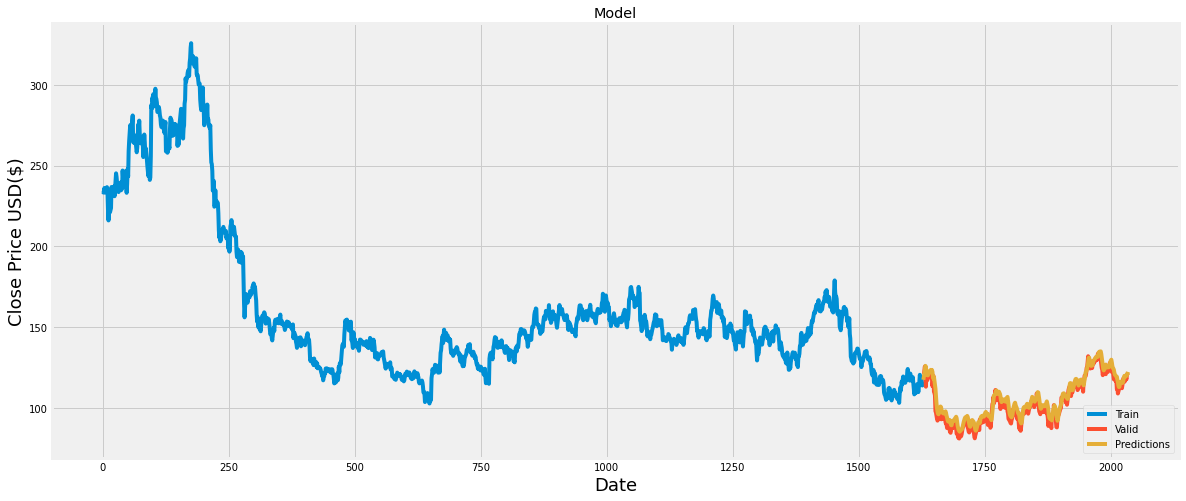

In [ ]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions']=predictions

#visulaization of data
plt.figure(figsize=(18,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(train['Close'])
#plt.xlim(1990,2020)
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Valid','Predictions'],loc='lower right')
plt.show()

In [ ]:
valid

,Close,predictions
1628,120.40,117.327431
1629,120.55,119.192184
1630,123.35,121.139526
1631,125.55,123.510117
1632,120.70,125.952553
...,...,...
2030,118.65,119.557487
2031,117.60,120.137642
2032,120.65,120.142906
2033,120.90,121.182259
